In [1]:
import numpy as np

In [2]:
class Linear_Regression():
    
    # Initializing the parameter (Learning rate & number of iterations)
    def __init__(self,lr,n_iter):
        self.lr = lr
        self.n_iter = n_iter
        
    
    def fit(self,X,y):
        # number of parameters(rows) & number of features (columns)
        self.m,self.n = X.shape
        
        # initializing weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        
        self.X = X
        self.y = y
        
        # implementing gradient descent
        for i in range(self.n_iter):
            self.update_weight()
            
        
    def update_weight(self):
        
        y_pred = self.predict(self.X)
        
        # calculate gradients
        dw = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m
        db = -2 * np.sum(self.y - y_pred) / self.m
        
        # update weight
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
        
        
    def predict(self, X):
        
        return X.dot(self.w) + self.b
        
        

###  USing linear regression model for prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Data preprocessing

In [4]:
df = pd.read_csv('/Users/raihan/Brototype/Dataset/dataset_for_models/Salary_Dataset.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
X = df.iloc[:,:1]

In [10]:
y = df.iloc[:,-1]


### Splitting dataset

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Training linear regression model

In [12]:
model = Linear_Regression(lr=0.02,n_iter=1000)

In [13]:
model.fit(X_train,y_train)

In [14]:
# printing parameters
print('Weight = ',model.w[0])
print('bias = ',model.b)

Weight =  9380.940726541196
bias =  26979.140955854207


### predict valueof test data

In [15]:
test_pred = model.predict(X_test)

In [16]:
test_pred

2      41050.552046
28    123602.830439
13     65440.997935
10     63564.809789
26    116098.077858
24    108593.325277
27    117036.171931
11     64502.903862
dtype: float64

### Visualizing actual and predicted values

<module 'matplotlib.pyplot' from '/Users/raihan/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

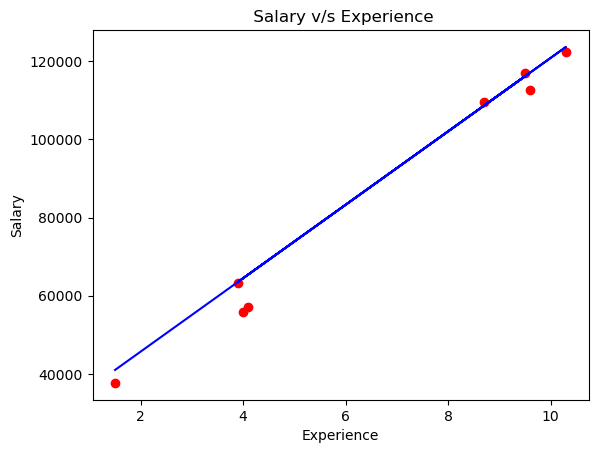

In [17]:
plt.scatter(X_test,y_test,color= 'red' )
plt.plot(X_test ,test_pred, color = 'blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title(' Salary v/s Experience')
plt